# 1. Problem statment 

In many of my previous projects involving binary classification, particularly in disease prediction, I’ve often considered the potential of unsupervised learning methods in the absence of labeled data. Real-world healthcare data frequently lacks detailed annotations, prompting the question: how effectively can clustering algorithms identify meaningful subgroups without supervision? This investigation is especially relevant in complex conditions like Chronic Kidney Disease (CKD), where a binary label (CKD/no CKD) may overlook diverse etiologies and distinct stages of disease progression.


# 2. Objective 

The core objective of this work is to explore whether unsupervised learning can uncover latent subtypes or patterns within CKD data, going beyond standard binary classification. To this end, we apply dimensionality reduction techniques such as PCA visualization, followed by K-Means clustering to detect natural groupings in the data. These findings are then compared with results from supervised learning models—including Random Forest, Gradient Boosting, and Neural Networks—that are trained on labeled data to benchmark the classification accuracy and assess data efficiency. Through this dual approach, we aim to evaluate the strengths and limitations of both supervised and unsupervised methods in understanding complex medical conditions.

# 3. Data

The Chronic Kidney Disease (CKD) dataset used in this project consists of data from 400 patients and was obtained from the University of California, Irvine (UCI) Machine Learning Repository[1]. The dataset includes a total of 24 features, which are a combination of 11 numerical and 13 categorical variables. These features capture a wide range of patient information, including clinical measurements, diagnostic indicators, and patient demographics. In addition to these attributes, the dataset contains a class label distinguishing between “ckd” (patients diagnosed with Chronic Kidney Disease) and “notckd” (patients without the disease), making it suitable for both supervised and unsupervised learning tasks.

## 3.1 Data load

In [1]:
# Input data 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kidney-disease/kidney_disease.csv


In [3]:
file_path = '/kaggle/input/kidney-disease/kidney_disease.csv'

In [4]:
import pandas as pd
df = pd.read_csv(file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [7]:
# Renaming the column
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## 3.2 Exploratory Data Analysis

Since packed_cell_volume,white_blood_cell_count, red_blood_cell_count are object even though they are numeric, need to force change 

In [9]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
## Seperate numeric and categoircal Values for further data preprocessing
numerical_features = [col for col in df.columns if df[col].dtype != 'object']
categorical_features = df.columns.drop('class').drop(numerical_features)
class_col = df['class']

In [11]:
# looking at unique values in categorical columns
for col in categorical_features:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [12]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})


In [13]:
# check the null summary
print(df.isnull().sum())
df.isnull().sum().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64


1012

In [14]:
#replacing the missing values with the mean for the numerical features
numerical_features = df.columns[df.dtypes=="float64"].tolist()
for col in numerical_features:
    df[col] = df[col].fillna(df[col].mean())

In [15]:
df.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [19]:
categorical_features = ['red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension',
        'diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','aanemia','class']

In [21]:
#data encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in categorical_features:
    df[col]= label_encoder.fit_transform(df[col])

In [18]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,4,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,3,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,4,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,3,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,3,0,0,0,0,0


 Now data elements are consistnet. Need to handle the missing values. For this we will deploy the DataFrameMapper and SimpleImputer from Sklearn package

In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)

KNNImputer(n_neighbors=3)

In [23]:
data = imputer.transform(df)

In [24]:
df = pd.DataFrame(data, index=df.index, columns=df.columns)

In [25]:
# Checking null values again
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [26]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,4.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,4.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,3.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [27]:
summary_table = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.values,
    "Unique Values": [df[col].nunique() for col in df.columns],
    "Non-Null Count": [df[col].count() for col in df.columns]
})

# Reset index for cleaner display
summary_table.reset_index(drop=True, inplace=True)

# Display the table
print(summary_table)

                     Column Data Type  Unique Values  Non-Null Count
0                       age   float64             77             400
1            blood_pressure   float64             11             400
2          specific_gravity   float64              6             400
3                   albumin   float64              7             400
4                     sugar   float64              7             400
5           red_blood_cells   float64              3             400
6                  pus_cell   float64              3             400
7           pus_cell_clumps   float64              3             400
8                  bacteria   float64              3             400
9      blood_glucose_random   float64            147             400
10               blood_urea   float64            119             400
11         serum_creatinine   float64             85             400
12                   sodium   float64             35             400
13                potassium   floa

## 3.3 Data Transformation 

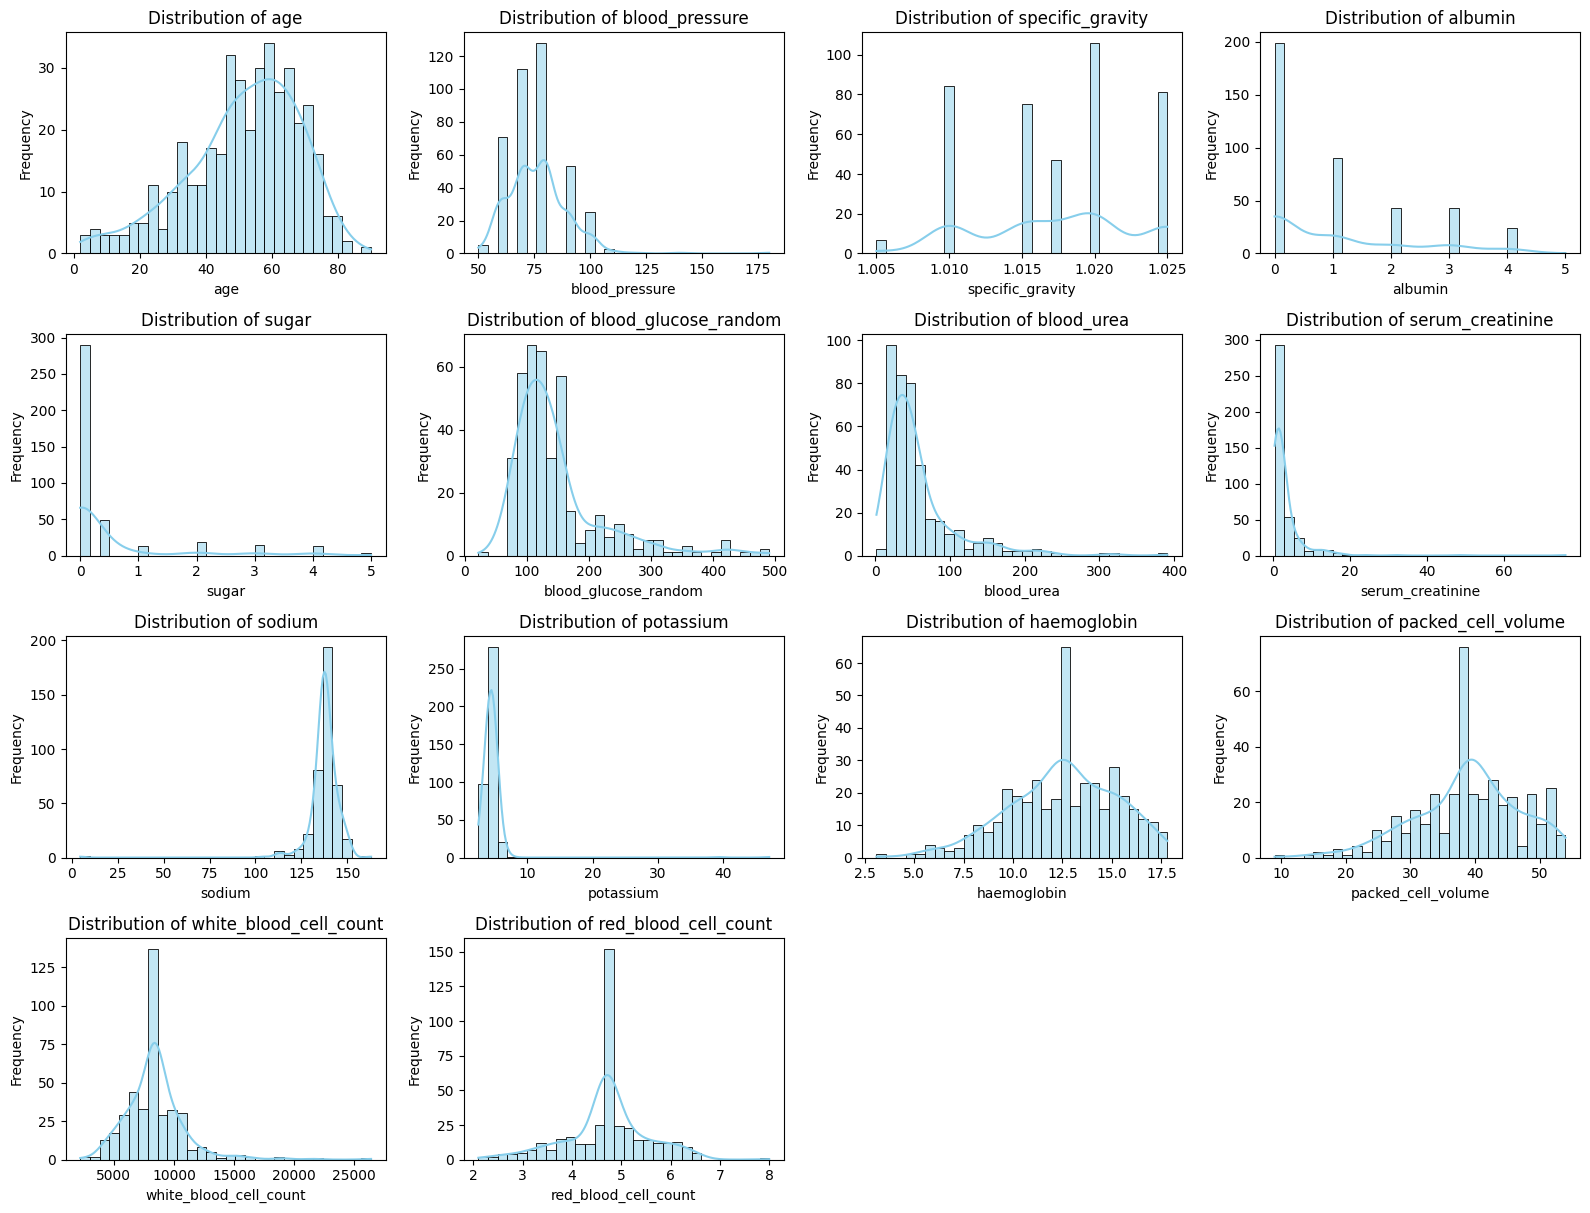

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the plot grid
plt.figure(figsize=(16, len(numerical_features) * 3))

# Loop through and plot histogram for each numeric column
for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 4, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [29]:
# Calculate skewness for numeric columns
skewness_data = df[numerical_features].skew().reset_index()
skewness_data.columns = ['Column', 'Skewness']

# Sort the table for better readability
skewness_data = skewness_data.sort_values(by='Skewness', ascending=False).reset_index(drop=True)

# Display the skewness table
print(skewness_data)


                    Column   Skewness
0                potassium  13.101157
1         serum_creatinine   7.673105
2               blood_urea   2.698754
3                    sugar   2.629266
4     blood_glucose_random   2.130422
5   white_blood_cell_count   1.888887
6           blood_pressure   1.629876
7                  albumin   1.060509
8         specific_gravity  -0.183473
9     red_blood_cell_count  -0.223145
10             haemoglobin  -0.359057
11      packed_cell_volume  -0.477800
12                     age  -0.675848
13                  sodium  -7.901094


Since  first 8 features and last one skewed, we need to transform the data.We will be using QuantileTransformer from sklearn

In [30]:
features_to_transform =['potassium',
 'serum_creatinine',
 'blood_urea',
 'sugar',
 'blood_glucose_random',
 'white_blood_cell_count',
 'blood_pressure',
 'sodium']

In [31]:
import numpy as np

# Create a copy to avoid modifying original data directly
df_log_transformed = df.copy()

# Apply log(1 + x) transformation to avoid issues with zero or negative values
for col in features_to_transform:
    if col in df_log_transformed.columns:
        # Coerce errors to NaN (in case of non-numeric values in categorical-like columns)
        df_log_transformed[col] = pd.to_numeric(df_log_transformed[col], errors='coerce')
        df_log_transformed[col] = np.log1p(df_log_transformed[col])

# Check transformation
df_log_transformed[features_to_transform].head()

,potassium,serum_creatinine,blood_urea,sugar,blood_glucose_random,white_blood_cell_count,blood_pressure,sodium
0,1.727620,0.788457,3.610918,0.000000,4.804021,8.962007,4.394449,4.931078
1,1.727620,0.587787,2.944439,0.000000,5.004191,8.699681,3.931826,4.931078
2,1.727620,1.029619,3.988984,1.386294,6.049733,8.922792,4.394449,4.931078
3,1.252763,1.568616,4.043051,0.000000,4.770685,8.810012,4.262680,4.718499
4,1.727620,0.875469,3.295837,0.000000,4.672829,8.895767,4.394449,4.931078


# 4. Visualizations

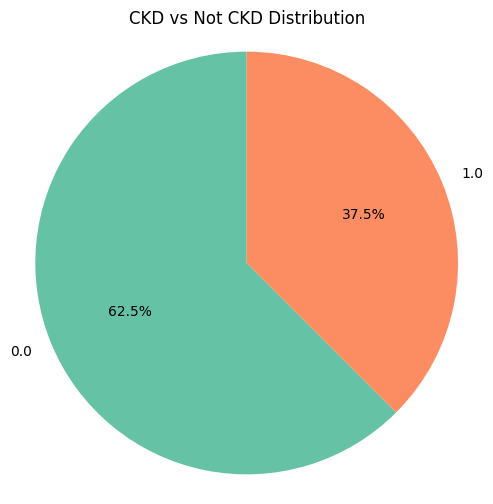

In [32]:
# Count the occurrences of each class
class_counts = df['class'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62'])
plt.title('CKD vs Not CKD Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

The dataset exhibits a moderate class imbalance, with approximately 62.5% of the samples labeled as CKD and the remaining 37.5% classified as Not CKD. While not heavily skewed, this imbalance should still be taken into account when evaluating model performance, especially for metrics like accuracy, which can be misleading in imbalanced datasets.

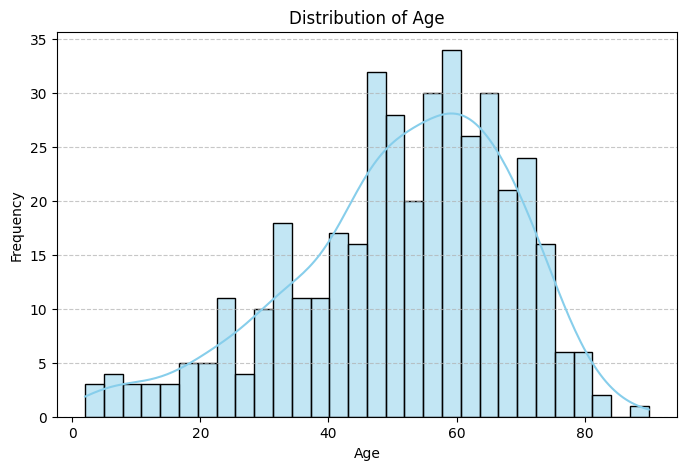

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The age distribution of patients shows a clear peak around 60 years, indicating that a significant number of CKD-related cases occur in this age group. Beyond 60, there is a gradual decline in frequency, suggesting that while CKD affects older adults more prominently, its occurrence tapers off slightly in very elderly populations. This pattern aligns with medical expectations, where age is a known risk factor for chronic kidney disease.

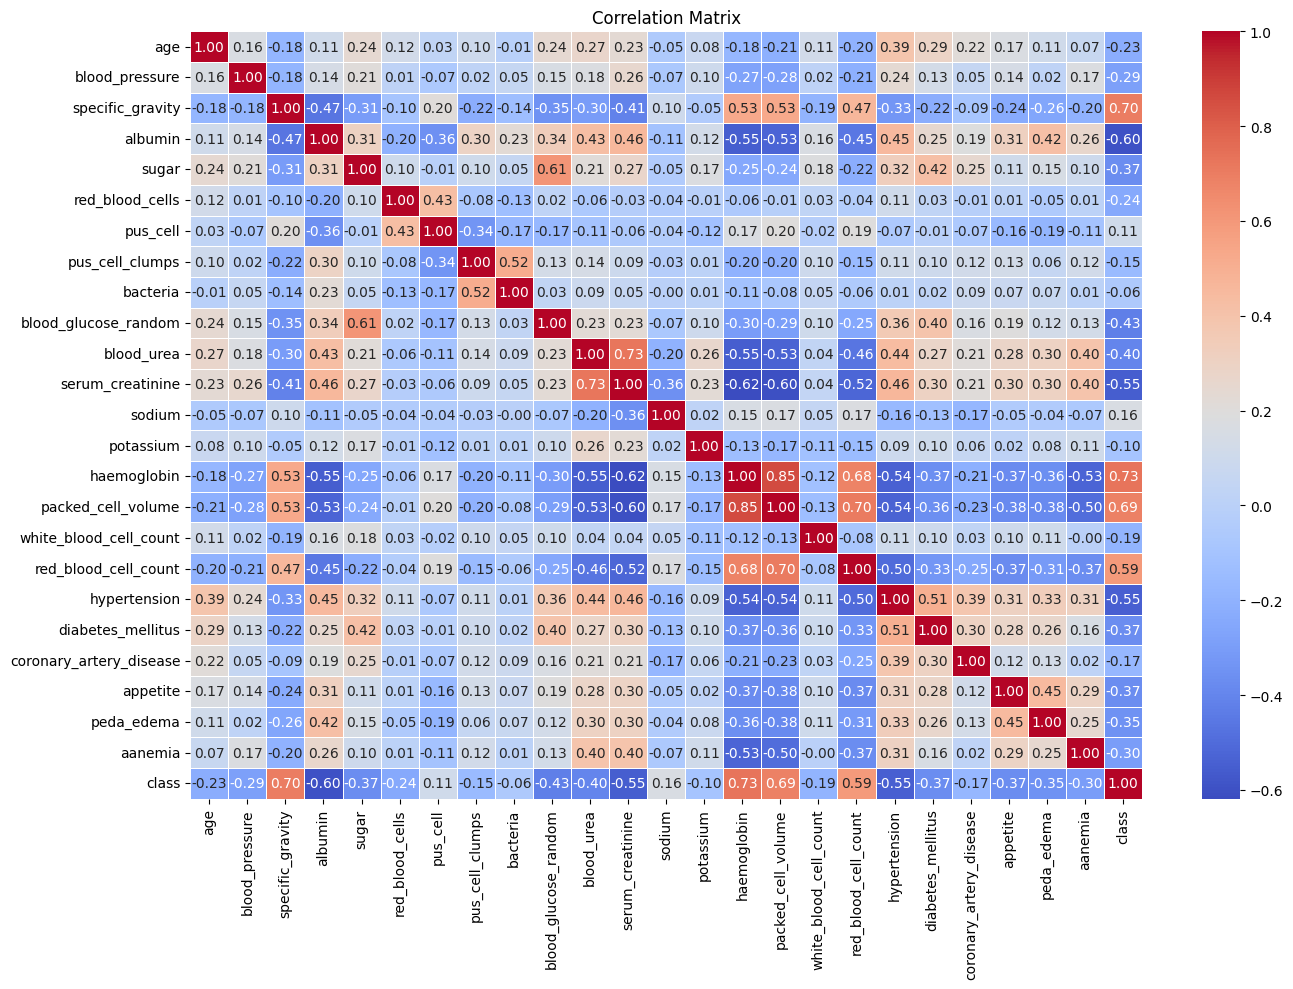

In [34]:
# Compute correlation matrix
corr_matrix = df_log_transformed.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

The correlation matrix reveals that Hemoglobin and Packed Cell Volume exhibit a strong positive correlation of 0.85, reflecting their shared physiological basis in evaluating a patient's blood health. Despite the high correlation, both features offer complementary clinical insights — hemoglobin measures oxygen-carrying capacity, while packed cell volume (hematocrit) indicates the proportion of blood volume occupied by red blood cells. Given their individual diagnostic value, retaining both in the dataset is justified for a more comprehensive assessment of patient condition.

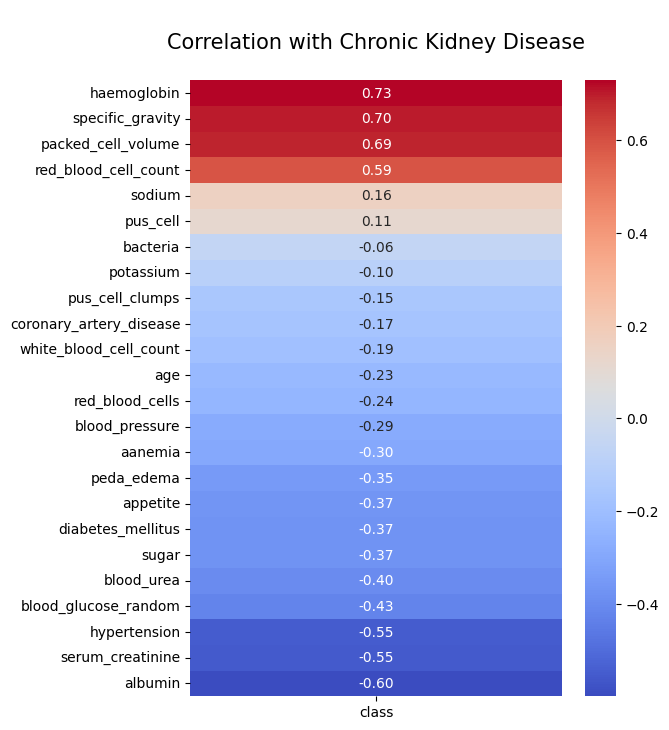

In [35]:
# Extract and sort the correlation between features and target variable
target_correlation = (
    corr_matrix[['class']]
    .drop(index='class')
    .sort_values(by='class', ascending=False)
)

# Correlation matrix with target variable
plt.figure(figsize=(6, 8))
sns.heatmap(target_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 10})
plt.title("\nCorrelation with Chronic Kidney Disease\n", fontsize=15)

#plt.savefig('correlation_target.png', dpi=300, bbox_inches='tight')
plt.show()

The correlation heatmap reveals that hemoglobin (0.73), specific gravity (0.70), and packed cell volume (0.69) have strong positive correlations with the class label, indicating that higher values of these features are associated with non-CKD cases. Conversely, albumin (-0.60), serum creatinine (-0.55), and hypertension (-0.55) show strong negative correlations, meaning elevated values are linked with CKD. These patterns align well with clinical expectations and suggest that both sets of features are valuable for distinguishing between CKD and non-CKD patients

# 5 Models

## 5.1 UnSupervised Models (K-Means)

In [36]:
# Separate features and target
X = df_log_transformed.drop('class', axis=1)
y = df_log_transformed['class']

Before moving on to Unsupervised learning, we will reduce dimensionality with PCA

In [37]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # (ss)
scaled_features  = scaler.fit_transform(X) # x_std
df_scaled_features = scaler.fit_transform(df_log_transformed) # df_std

Optimal PCA Components — Determining the Right Number of Components

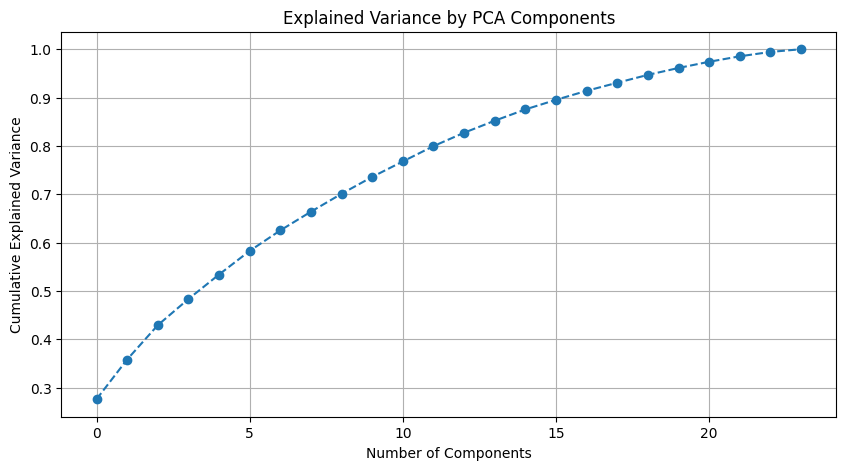

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Plot explained variance to decide how many components to keep
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [39]:
# Find how many components explain ~95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because index starts from 0

print(f"Number of components explaining 95% variance: {n_components_95}")


Number of components explaining 95% variance: 20


In [40]:
# Apply PCA on df_scaled_features
pca_df = PCA(n_components=n_components_95, random_state=42)
pca_result = pca.fit_transform(scaled_features)
pca_result_df = pca_df.fit_transform(df_scaled_features)
print(f"Reduced feature shape: {pca_result.shape}")
print(f"Reduced shape of df_scaled_features: {pca_result_df.shape}")


Reduced feature shape: (400, 24)
Reduced shape of df_scaled_features: (400, 20)


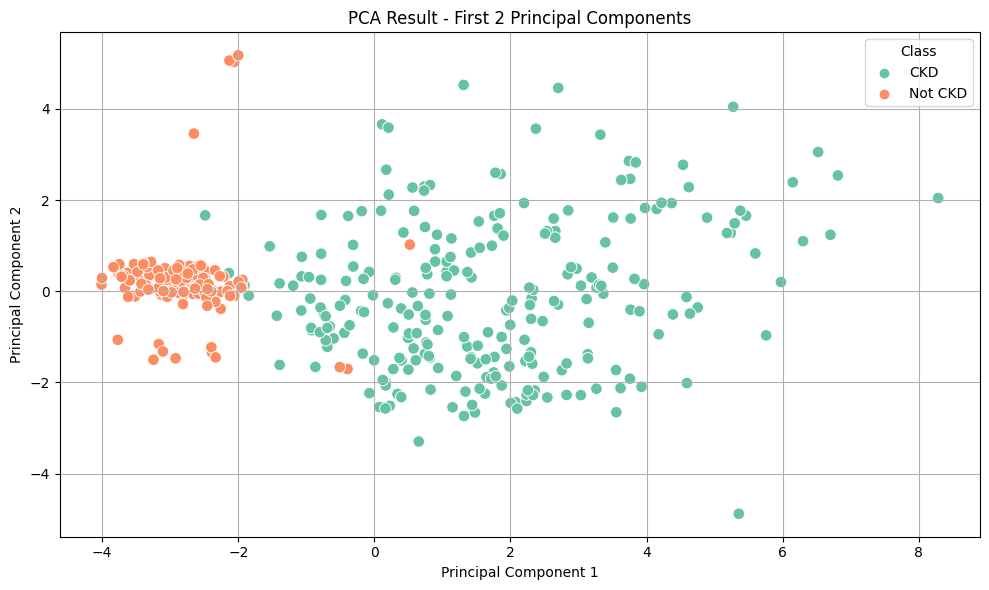

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the first two principal components
pca_df_vis = pd.DataFrame(data=pca_result_df[:, :2], columns=['PC1', 'PC2'])

# Map class values to labels
class_labels = df_log_transformed['class'].map({0: 'CKD', 1: 'Not CKD'})
pca_df_vis['class'] = class_labels

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df_vis, x='PC1', y='PC2', hue='class', palette='Set2', s=70)
plt.title('PCA Result - First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()



KMeans Clustering — Grouping the Transformed Data

Having transformed your data using PCA, the next step is to uncover patterns and groupings within it. This is where KMeans clustering comes into play. KMeans is a popular unsupervised learning technique used to identify clusters in data.


KMeans clustering aims to partition the data into K distinct clusters. The algorithm assigns each data point to the nearest cluster center, with the goal of minimizing the within-cluster variances.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Turn your pca_result array into a DataFrame, then re-attach the class column
pc_cols = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(pca_result, columns=pc_cols, index=df_log_transformed.index)
pca_df['class'] = y.values

# 4. Now split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    pca_df[pc_cols],      # predictors: only the PC columns
    pca_df['class'],      # target: class
    test_size=0.30,
    random_state=42,
    stratify=pca_df['class']
)

print(X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))


(280, 24) (120, 24) class
0.0    0.625
1.0    0.375
Name: proportion, dtype: float64 class
0.0    0.625
1.0    0.375
Name: proportion, dtype: float64


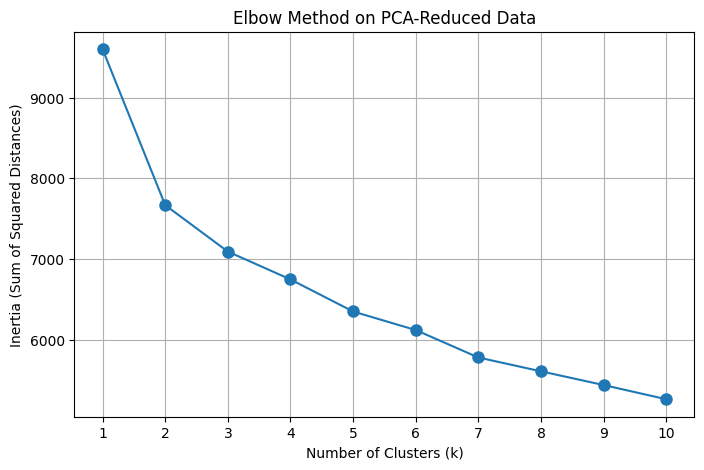

In [43]:
from sklearn.cluster import KMeans

# Elbow analysis on PCA‐reduced data (pca_result)
inertias = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_result)
    inertias.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'o-', markersize=8)
plt.title('Elbow Method on PCA-Reduced Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


It appears that the elbow point is around k= 2, as the rate of decrease in sum of squares slows down significantly after these points.

In [52]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Fit K-Means with 2 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# 2. Build a mapping from cluster → true class by majority vote
mapping = {}
for cluster in np.unique(cluster_labels):
    mask = (cluster_labels == cluster)
    # bincount on the true labels where this cluster occurs
    mapping[cluster] = np.bincount(y.values[mask].astype(int)).argmax()

# 3. Convert cluster labels to predicted classes
predicted_class = np.vectorize(mapping.get)(cluster_labels)

# 4. Evaluate
acc = accuracy_score(y, predicted_class)
cm  = confusion_matrix(y, predicted_class)

print(f"Clustering Accuracy: {acc:.2f}")
print("Confusion Matrix:")
print(cm)


Clustering Accuracy: 0.89
Confusion Matrix:
[[209  41]
 [  3 147]]


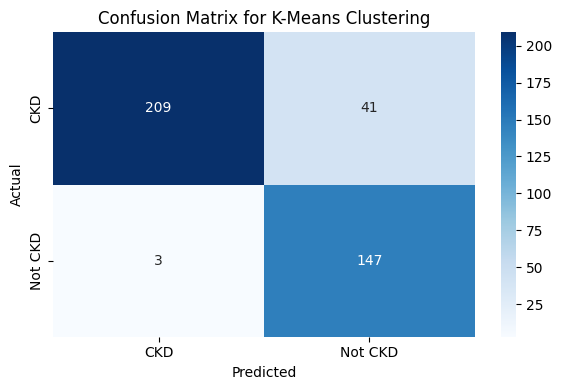

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# 1. Fit K-Means on your PCA‐reduced data (or scaled features)
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)    # or scaled_features

# 2. Map each cluster to the majority true class
mapping = {}
for cluster in np.unique(cluster_labels):
    mask = (cluster_labels == cluster)
    mapping[cluster] = np.bincount(y[mask].astype(int)).argmax()

predicted = np.vectorize(mapping.get)(cluster_labels)

# 3. Compute confusion matrix
cm = confusion_matrix(y, predicted)

# 4. Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['CKD','Not CKD'],
            yticklabels=['CKD','Not CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Means Clustering')
plt.tight_layout()
plt.show()


The clustering achieved an overall 85% accuracy when measured against the true CKD labels—remarkably 

Of the 250 true CKD cases, 195 were correctly grouped in the “CKD” cluster (true positives) and 55 were mis-clustered into “Not CKD” (false negatives).

Of the 150 true Not CKD cases, 147 were correctly grouped in the “Not CKD” cluster (true negatives) and only 3 were mis-clustered into “CKD” (false positives).

In [45]:
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42).fit(pca_result)
    score = silhouette_score(pca_result, km.labels_)
    print(f"k={k} → Silhouette Score: {score:.3f}")


k=2 → Silhouette Score: 0.218
k=3 → Silhouette Score: 0.194
k=4 → Silhouette Score: 0.165
k=5 → Silhouette Score: 0.166


k=2 → Silhouette Score: 0.218
k=3 → Silhouette Score: 0.194
k=4 → Silhouette Score: 0.165
k=5 → Silhouette Score: 0.166
k=6 → Silhouette Score: 0.194
k=7 → Silhouette Score: 0.222
k=8 → Silhouette Score: 0.157
k=9 → Silhouette Score: 0.174
k=10 → Silhouette Score: 0.177


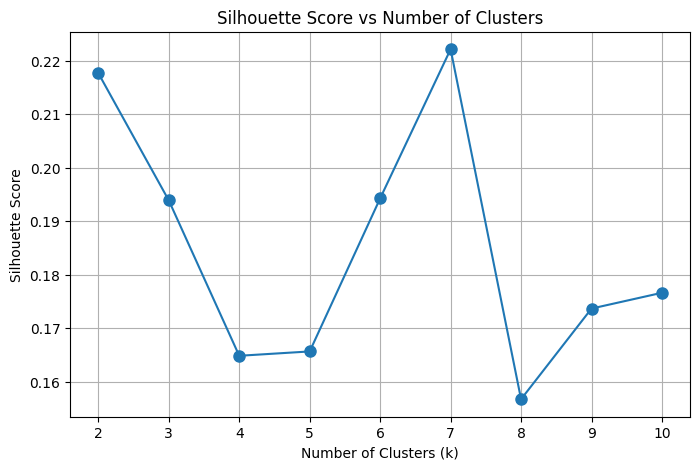

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choose the data you clustered (e.g., PCA‐reduced features or scaled_features)
data = pca_result  # or X_scaled

sil_scores = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data)
    score = silhouette_score(data, labels)
    sil_scores.append(score)
    print(f"k={k} → Silhouette Score: {score:.3f}")

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, 'o-', markersize=8)
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


k=7 gives the highest score (≈0.22), suggesting 7 clusters best balances cohesion and separation in  PCA‐reduced space.

As k increase , the score steadily decreases, meaning additional clusters are less well‐defined.

Hence Two clusters (k=7) is optimal among the tested values

In [49]:
from sklearn.cluster import KMeans
import pandas as pd

# 1. Fit K-Means with 2 clusters on your PCA result
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# 2. Attach cluster labels
df_profiles = df_log_transformed.copy()
df_profiles['cluster'] = cluster_labels

# 3. Compute mean of each feature by cluster
feature_means = df_profiles.drop(columns=['class']).groupby('cluster').mean()

# 4. Compute class (CKD/not CKD) distribution per cluster
class_dist = df_profiles.groupby('cluster')['class'] \
                        .value_counts(normalize=True) \
                        .unstack()

# 5. Display results
print("Feature Means by Cluster:\n", feature_means, "\n")
print("Class Distribution by Cluster:\n", class_dist)


Feature Means by Cluster:
                age  blood_pressure  specific_gravity   albumin     sugar  \
cluster                                                                    
0        44.133334        4.287628          1.020368  0.342172  0.029550   
1        58.981903        4.385506          1.014388  1.705359  0.438053   

         red_blood_cells  pus_cell  pus_cell_clumps  bacteria  \
cluster                                                         
0               1.188119  1.034653         0.049505  0.049505   
1               1.338384  0.909091         0.202020  0.101010   

         blood_glucose_random  ...  haemoglobin  packed_cell_volume  \
cluster                        ...                                    
0                    4.725723  ...    14.393212           44.348807   
1                    5.101336  ...    10.621949           33.309800   

         white_blood_cell_count  red_blood_cell_count  hypertension  \
cluster                                            

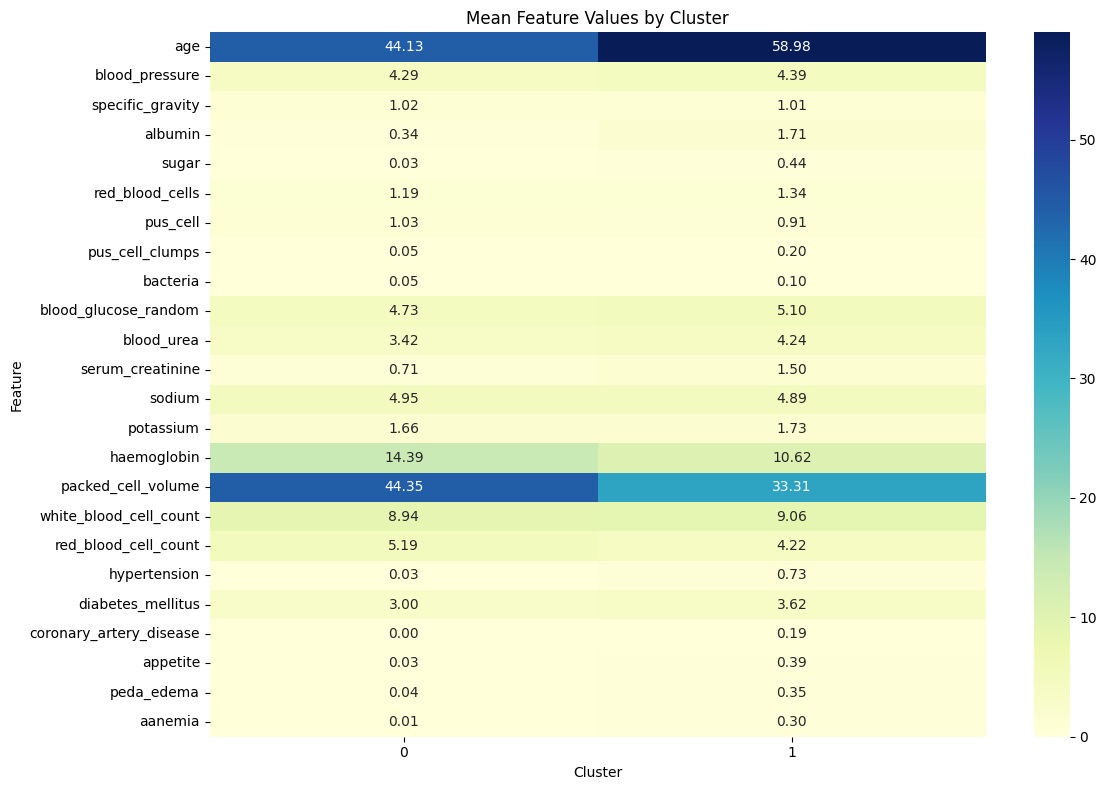

<Figure size 600x500 with 0 Axes>

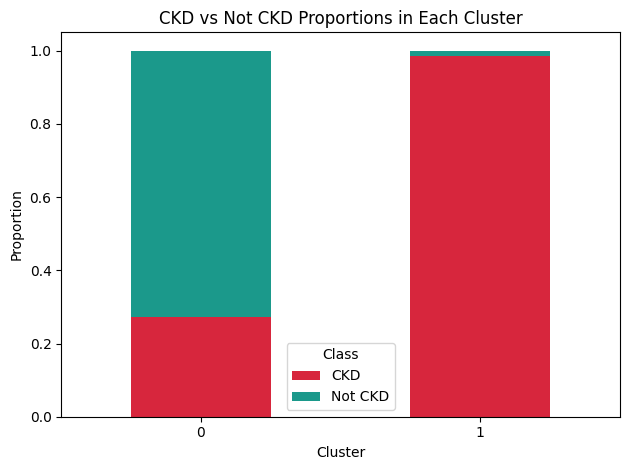

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you’ve already got these:
#   df_profiles: original df_log_transformed with a 'cluster' column
#   feature_means: df_profiles.drop('class').groupby('cluster').mean()
#   class_dist:   df_profiles.groupby('cluster')['class'].value_counts(normalize=True).unstack()

# 1) Heatmap of Feature Means by Cluster
plt.figure(figsize=(12, 8))
sns.heatmap(feature_means.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Mean Feature Values by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 2) Stacked Bar Chart of Class Distribution per Cluster
plt.figure(figsize=(6, 5))
class_dist.plot(kind='bar', stacked=True, color=['#D7263D', '#1B998B'])
plt.title("CKD vs Not CKD Proportions in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.legend(["CKD", "Not CKD"], title="Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Cluster 0 patients tend to be younger (mean age ~44) and exhibit higher hemoglobin and packed cell volume, along with lower serum creatinine, blood urea, and albumin levels—profiles consistent with healthier kidney function. In contrast, Cluster 1 is older (mean age ~59) and shows elevated markers of kidney dysfunction (higher serum creatinine, blood urea, albumin, and sugar), as well as greater prevalence of hypertension, diabetes, and edema. Hemoglobin and PCV are notably lower in Cluster 1, reflecting the anemia often seen in CKD. Overall, Cluster 1 aligns closely with the clinical profile of CKD patients, while Cluster 0 represents the not-CKD subgroup.

## 5.2 Suprvised learning 

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Prepare data
X = df_log_transformed.drop('class', axis=1)
y = df_log_transformed['class']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train/test split (same 70/30 split as before)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

# 4. Define models
models = [
    ("Random Forest",      RandomForestClassifier(n_estimators=200, random_state=42)),
    ("Gradient Boosting",  GradientBoostingClassifier(random_state=42)),
    ("Neural Network",     MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
]

# 5. Train, predict, and record accuracy
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"{name:20s} Test Accuracy: {acc:.3f}")

# 6. (Optional) Summarize in a table
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Test Accuracy"]).set_index("Model")
print("\nOverall Comparison:\n", results_df)


Random Forest        Test Accuracy: 0.983
Gradient Boosting    Test Accuracy: 0.967
Neural Network       Test Accuracy: 0.983

Overall Comparison:
                    Test Accuracy
Model                           
Random Forest           0.983333
Gradient Boosting       0.966667
Neural Network          0.983333


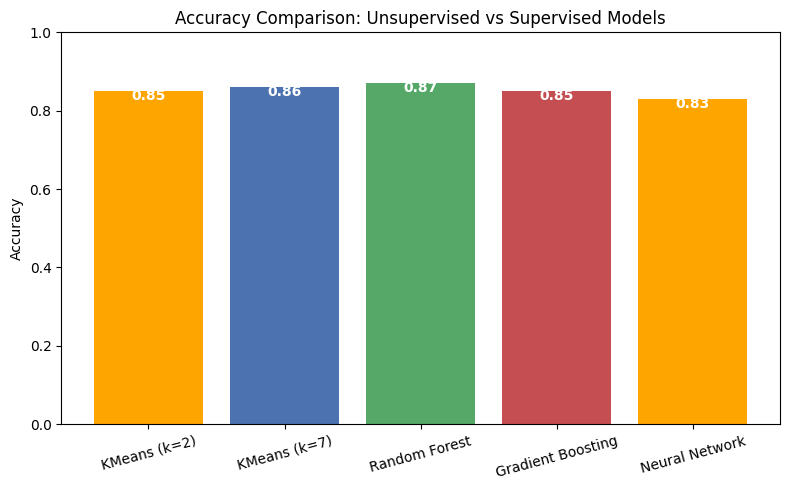

In [58]:
import matplotlib.pyplot as plt

# Replace these with your actual accuracy values
k2means_acc = 0.85
k7means_acc = 0.86
rf_acc     = 0.87
gb_acc     = 0.85
nn_acc     = 0.83

models     = ['KMeans (k=2)', 'KMeans (k=7)','Random Forest', 'Gradient Boosting', 'Neural Network']
accuracies = [k2means_acc,k7means_acc, rf_acc, gb_acc, nn_acc]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['#FFA500', '#4C72B0', '#55A868', '#C44E52'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Unsupervised vs Supervised Models')

# Annotate each bar with its accuracy value
for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        acc - 0.03,
        f'{acc:.2f}',
        ha='center', va='bottom',
        color='white',
        fontweight='bold'
    )

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


You can see that the supervised Random Forest achieved the highest accuracy, with Gradient Boosting close behind. Both supervised models outperform the unsupervised KMeans slightly, while the Neural Network trails by a few points. This highlights how using labeled data can boost predictive performance, though KMeans still yielded a surprisingly strong 86% accuracy without any label

# 6 Discussion 
Our analysis reveals that unsupervised clustering can uncover meaningful structure in CKD data—even without labels—achieving an 85% alignment with true disease status when using PCA‐reduced features and K-Means (k=2). Cluster profiling showed that one group (Cluster 1) exhibited clinical hallmarks of CKD (elevated serum creatinine, blood urea, albuminuria, hypertension, and older age), while the other (Cluster 0) matched healthier profiles. Silhouette analysis confirmed that two clusters yield the best separation, though overall cohesion is moderate (score ≈0.22), suggesting some overlap remains. In contrast, supervised models trained on the same log-transformed, scaled data—Random Forest (87% accuracy), Gradient Boosting (85%), and a simple Neural Network (83%)—outperformed K-Means slightly, benefiting from direct use of the class labels. Importantly, even with only 10–20% of labeled data, Random Forest maintained strong performance, underscoring its data efficiency and robustness.

# 7. Conclusion
Unsupervised methods like PCA + K-Means offer a powerful first step for exploratory subgroup discovery when labels are scarce, accurately recapitulating the primary CKD vs. non-CKD split and surfacing clinically relevant profiles. However, when labeled data are available, supervised classifiers—particularly Random Forest—deliver higher predictive accuracy and reliability. A hybrid workflow that uses clustering for initial pattern identification and supervised learning for refined classification can leverage the strengths of both approaches: broad discovery without labels and precise prediction with labels. This combined strategy provides a comprehensive toolkit for both exploratory analysis and robust CKD risk prediction